In [1]:
import tensorflow as tf

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [3]:
tf.test.is_built_with_cuda()
print(tf.version.VERSION)


2.3.0


In [4]:
import sys
sys.version

'3.8.10 (default, May 19 2021, 13:12:57) [MSC v.1916 64 bit (AMD64)]'

In [5]:
!pip install matplotlib

You should consider upgrading via the 'c:\windows\system32\tfgpu1\scripts\python.exe -m pip install --upgrade pip' command.


In [6]:
!pip install pandas
!pip install seaborn

You should consider upgrading via the 'c:\windows\system32\tfgpu1\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\windows\system32\tfgpu1\scripts\python.exe -m pip install --upgrade pip' command.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os
import seaborn as sns

In [8]:
from zipfile import ZipFile
ZipFile("./data/test.zip").extractall(".\data")

ZipFile("./data/training.zip").extractall(".\data")

In [9]:
train_file = './data/training.csv'
test_file = './data/test.csv'
lookup_file = './data/IdLookupTable.csv'

In [10]:
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)
lookup = pd.read_csv(lookup_file)

In [11]:
train.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [13]:
print(train.shape)
print(test.shape)

(7049, 31)
(1783, 2)


In [18]:
train.head(3)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...


In [19]:
lookup.head()


,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


In [20]:
test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [21]:
train.isnull()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,False,False,False,False,True,True,True,True,True,True,...,False,True,True,True,True,True,True,False,False,False
7045,False,False,False,False,True,True,True,True,True,True,...,False,True,True,True,True,True,True,False,False,False
7046,False,False,False,False,True,True,True,True,True,True,...,False,True,True,True,True,True,True,False,False,False
7047,False,False,False,False,True,True,True,True,True,True,...,False,True,True,True,True,True,True,False,False,False


In [22]:
train.isnull().any().value_counts()

True     28
False     3
dtype: int64

In [10]:
train.fillna(method = 'ffill',inplace = True)
train.isnull().any().value_counts()


False    31
dtype: int64

In [11]:
#parting the labels and the features
imag = []
for i in range(0,7049):
    img = train['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    imag.append(img)

In [12]:
#coverting into float
image_list = np.array(imag,dtype = 'float')
X_train = image_list.reshape(-1,96,96,1)

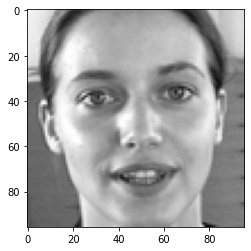

In [13]:
plt.imshow(X_train[20].reshape(96,96),cmap='gray')
plt.show()

In [19]:
#saperating the labels
training = train.drop('Image',axis = 1)

y_train = []
for i in range(0,7049):
    y = training.iloc[i,:]

    y_train.append(y)
y_train = np.array(y_train,dtype = 'float')

In [28]:
#model

In [29]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten, Conv2D, MaxPooling2D

In [30]:
# !conda install keras

In [32]:
import keras

In [25]:
#from tensorflow.python import keras

In [33]:
print(keras.__version__)

2.4.3


In [34]:
from keras.models import Sequential

In [35]:
from keras.layers.advanced_activations import ReLU

In [36]:

from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

In [37]:
model = Sequential()

model.add(Convolution2D(32, (3,3), activation = 'relu', padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3,3), activation = 'relu', padding='same', use_bias=False))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), activation = 'relu', padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3), activation = 'relu', padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        288       
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18432     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        2

In [38]:
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['acc'])

In [49]:
model.fit(X_train,y_train,epochs = 52,batch_size = 32,validation_split = 0.2)

Epoch 1/52
177/177 [==============================] - 3s 20ms/step - loss: 5.2334 - acc: 0.8631 - val_loss: 3.4056 - val_acc: 0.7355
Epoch 2/52
177/177 [==============================] - 3s 19ms/step - loss: 4.8626 - acc: 0.8704 - val_loss: 2.6226 - val_acc: 0.7823
Epoch 3/52
177/177 [==============================] - 3s 19ms/step - loss: 5.0589 - acc: 0.8700 - val_loss: 7.1074 - val_acc: 0.8014
Epoch 4/52
177/177 [==============================] - 3s 19ms/step - loss: 5.2686 - acc: 0.8665 - val_loss: 3.6715 - val_acc: 0.7560
Epoch 5/52
177/177 [==============================] - 3s 19ms/step - loss: 5.2843 - acc: 0.8650 - val_loss: 2.9598 - val_acc: 0.7851
Epoch 6/52
177/177 [==============================] - 3s 19ms/step - loss: 5.1615 - acc: 0.8721 - val_loss: 3.2066 - val_acc: 0.7319
Epoch 7/52
177/177 [==============================] - 3s 19ms/step - loss: 4.9712 - acc: 0.8677 - val_loss: 2.6617 - val_acc: 0.7695
Epoch 8/52
177/177 [==============================] - 3s 19ms/step - 

In [50]:
timag = []
for i in range(0,1783):
    timg = test['Image'][i].split(' ')
    timg = ['0' if x == '' else x for x in timg]    
    timag.append(timg)
    
    
# reshape and convert

timage_list = np.array(timag,dtype = 'float')
X_test = timage_list.reshape(-1,96,96,1) 



In [51]:
pred = model.predict(X_test)

In [53]:
lookid_list = list(lookup['FeatureName'])
imageID = list(lookup['ImageId']-1)
pre_list = list(pred)

rowid = lookup['RowId']
rowid=list(rowid)

feature = []
for f in list(lookup['FeatureName']):
    feature.append(lookid_list.index(f))
    

preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])
rowid = pd.Series(rowid,name = 'RowId')
loc = pd.Series(preded,name = 'Location')
submission = pd.concat([rowid,loc],axis = 1)
submission.to_csv('face_key3_submission.csv',index = False)

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, AvgPool2D, BatchNormalization, Dropout, Activation, MaxPooling2D
from keras.optimizers import Adam
from keras import regularizers
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

In [15]:
model1 = Sequential()

model1.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model1.add(LeakyReLU(alpha = 0.1))
model1.add(BatchNormalization())

model1.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model1.add(LeakyReLU(alpha = 0.1))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2, 2)))

model1.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model1.add(LeakyReLU(alpha = 0.1))
model1.add(BatchNormalization())

model1.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model1.add(LeakyReLU(alpha = 0.1))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2, 2)))

model1.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model1.add(LeakyReLU(alpha = 0.1))
model1.add(BatchNormalization())

model1.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model1.add(LeakyReLU(alpha = 0.1))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2, 2)))

model1.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# model.add(BatchNormalization())
model1.add(LeakyReLU(alpha = 0.1))
model1.add(BatchNormalization())

model1.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model1.add(LeakyReLU(alpha = 0.1))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2, 2)))

model1.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model1.add(LeakyReLU(alpha = 0.1))
model1.add(BatchNormalization())

model1.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model1.add(LeakyReLU(alpha = 0.1))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2, 2)))

model1.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model1.add(LeakyReLU(alpha = 0.1))
model1.add(BatchNormalization())

model1.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model1.add(LeakyReLU(alpha = 0.1))
model1.add(BatchNormalization())


model1.add(Flatten())
model1.add(Dense(512,activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(30))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0

In [16]:
model1.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['acc'])

In [20]:
model1.fit(X_train,y_train,epochs = 60,batch_size = 32,validation_split = 0.2)

Epoch 1/60
177/177 [==============================] - 48s 271ms/step - loss: 71.1463 - acc: 0.3896 - val_loss: 24.7847 - val_acc: 0.5780
Epoch 2/60
177/177 [==============================] - 14s 82ms/step - loss: 17.4986 - acc: 0.5735 - val_loss: 7.3931 - val_acc: 0.7050
Epoch 3/60
177/177 [==============================] - 14s 80ms/step - loss: 13.7904 - acc: 0.6414 - val_loss: 4.6258 - val_acc: 0.7518
Epoch 4/60
177/177 [==============================] - 14s 79ms/step - loss: 12.0738 - acc: 0.6796 - val_loss: 7.7026 - val_acc: 0.6993
Epoch 5/60
177/177 [==============================] - 14s 80ms/step - loss: 10.8051 - acc: 0.6987 - val_loss: 6.8524 - val_acc: 0.7064
Epoch 6/60
177/177 [==============================] - 14s 80ms/step - loss: 10.9202 - acc: 0.7109 - val_loss: 3.3667 - val_acc: 0.7426
Epoch 7/60
177/177 [==============================] - 14s 79ms/step - loss: 10.5948 - acc: 0.7230 - val_loss: 5.2892 - val_acc: 0.7759
Epoch 8/60
177/177 [==============================] -

In [21]:
timag = []
for i in range(0,1783):
    timg = test['Image'][i].split(' ')
    timg = ['0' if x == '' else x for x in timg]    
    timag.append(timg)
    
    
# reshape and convert

timage_list = np.array(timag,dtype = 'float')
X_test = timage_list.reshape(-1,96,96,1) 



In [24]:
pred1 = model1.predict(X_test)

In [26]:
lookid_list = list(lookup['FeatureName'])
imageID = list(lookup['ImageId']-1)
pre_list1 = list(pred1)

rowid = lookup['RowId']
rowid=list(rowid)

feature = []
for f in list(lookup['FeatureName']):
    feature.append(lookid_list.index(f))
    

preded1 = []
for x,y in zip(imageID,feature):
    preded1.append(pre_list1[x][y])
rowid = pd.Series(rowid,name = 'RowId')
loc = pd.Series(preded1,name = 'Location')
submission = pd.concat([rowid,loc],axis = 1)
submission.to_csv('face_key4_submission.csv',index = False)

In [27]:
#model2 performed more better with rmse=2.5
#model1 rmse=2.6